In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import plotly.express as px
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
from six import StringIO
from graphviz import Source

In [ ]:
data = pd.read_csv('/content/admission - admission.csv')
print(data.head)

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1        337          118                  4  4.5  4.5  9.65   
1             2        324          107                  4  4.0  4.5  8.87   
2             3        316          104                  3  3.0  3.5  8.00   
3             4        322          110                  3  3.5  2.5  8.67   
4             5        314          103                  2  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
495         496        332          108                  5  4.5  4.0  9.02   
496         497        337          117                  5  5.0  5.0  9.87   
497         498        330          120                  5  4.5  5.0  9.56   
498         499        312          103                  4  4.0  5.0  8.43   
499         500        327          113                  4  4.5  4.5  9.04   

     Research  Chance of Admit  


In [ ]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print("Accuracy: ", accuracy)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.006017
R^2 Score: 0.6489864827418841


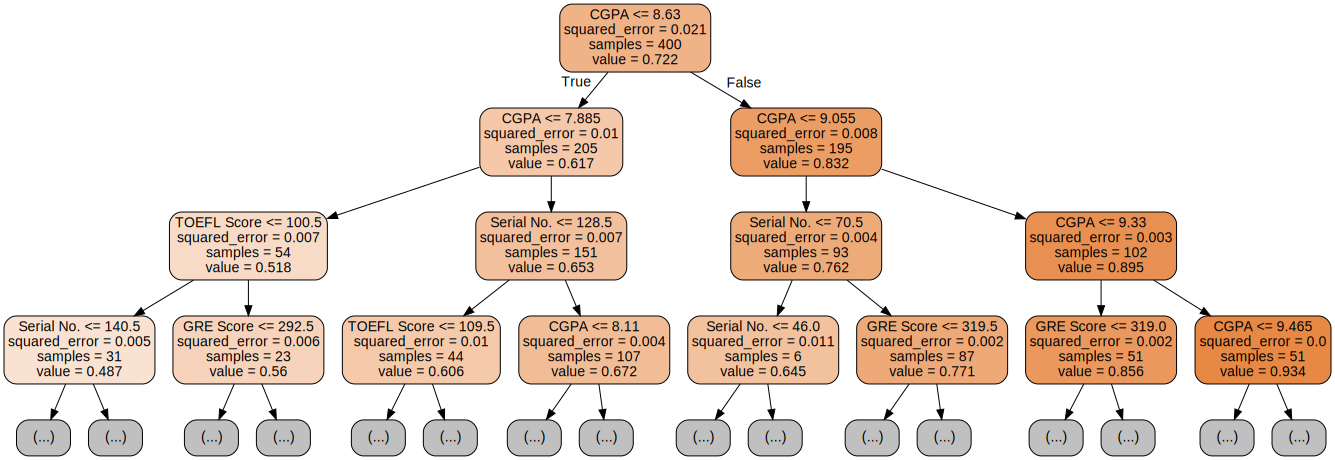

In [ ]:
export_graphviz(
    regressor,
    out_file = 'admission.dot',
    filled = True, rounded = True,
    feature_names = X.columns,
    max_depth = 3
)

with open('admission.dot') as f:
  dot_graph = f.read()

Source(dot_graph)

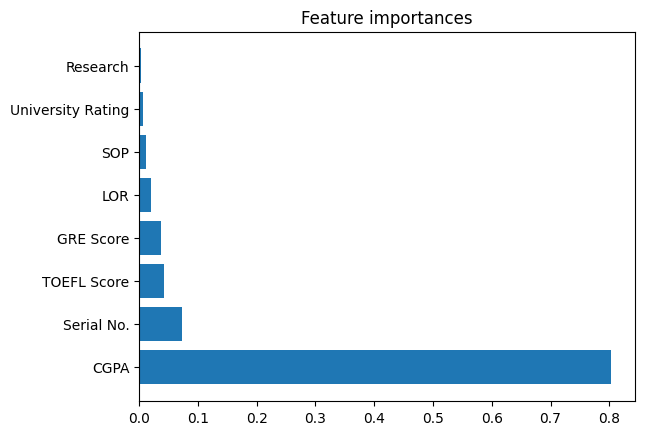

In [ ]:
import matplotlib.pyplot as plt

importance = regressor.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
# plt.ylim([-1, X.shape[1]])
plt.show()


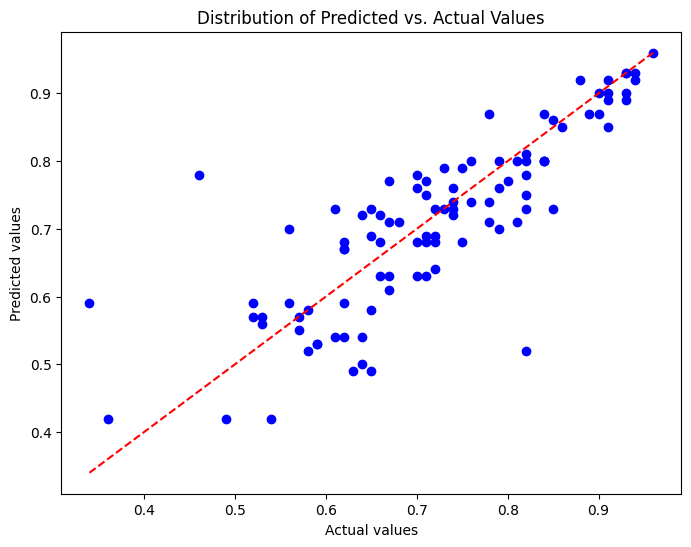

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Distribution of Predicted vs. Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()